**Let's Analyz and find following**
* Is there any trend in the sales of all four products during certain months?
* Out of all four products , which product has seen the highest sales in all the given years?
* The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.
* The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company. 
* The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.



## Import Libraries

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Loading Dataset

In [45]:
data = pd.read_csv('statsfinal.csv')

In [46]:
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [47]:
data.shape

(4600, 10)

In [48]:
data.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')

**Observation**
* column "uamed:0" is having unique key so no use
* data strat from 13-6-2010 and end at 02-02-23 so we have both years incomplete data 
* we have Each products sales and revenve with day,month and year

The next four columns 'Q-P1', 'Q-P2', 'Q-P3', and 'Q-P4' represent the total unit sales of products 1, 2, 3, and 4, respectively. The next four columns 'S-P1', 'S-P2', 'S-P3', and 'S-P4' represent the total revenue generated from products 1, 2, 3, and 4, respectively.

In [49]:
#droping useless data
data=data.drop(columns=['Unnamed: 0'])

In [50]:
# split data colum so we can drop 2010 and 2023 data for incomplete data
data['Day'] =data['Date'].apply(lambda x:x.split('-')[0])
data['Month']=data['Date'].apply(lambda x:x.split('-')[1])
data['Year']=data['Date'].apply(lambda x:x.split('-')[2])

In [51]:
#droping Data from 2010 and 2023
data = data.drop(index=data[(data['Year'] == '2010') | (data['Year'] == '2023')].index)


In [54]:
data['Day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [53]:
data['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '9', '10',
       '11', '12'], dtype=object)

**Observation**

9 is extra month here

In [10]:
print(data[data['Month']=='9'])

           Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
473   31-9-2011  2242   401  5926   789   7107.14   2542.34  32118.92   
836   31-9-2012  1003   256  1346  1449   3179.51   1623.04   7295.32   
1200  31-9-2013   597   709  5470  1994   1892.49   4495.06  29647.40   
1564  31-9-2014  5333   833  3494   618  16905.61   5281.22  18937.48   
1928  31-9-2015  3583  2111  4225  1401  11358.11  13383.74  22899.50   
2291  31-9-2016  7891   741  2280  1068  25014.47   4697.94  12357.60   
2655  31-9-2017  3512  2851  4072  1597  11133.04  18075.34  22070.24   
3019  31-9-2018  1727  2645  5715  1295   5474.59  16769.30  30975.30   
3383  31-9-2019  3195  2525  5918  1003  10128.15  16008.50  32075.56   
3746  31-9-2020  4713  1227  4065   403  14940.21   7779.18  22032.30   
4110  31-9-2021  3511  2609  1543   853  11129.87  16541.06   8363.06   
4474  31-9-2022  6964  1873  5481  1336  22075.88  11874.82  29707.02   

          S-P4 Day Month  Year  
473    5625.57  3

**Observation**

November only has 30 days, so there cannot be a date of 31-09-20. It is likely that the date column has incorrect or inconsistent formatting.

In [56]:
missing_months = []

for month in range(1, 13):
    max_day = data[data['Month'] == str(month).zfill(2)]['Day'].astype(int).max()
    if max_day < 31:
        missing_months.append(month)

print("The month(s) missing the 31st date is/are:", missing_months)

The month(s) missing the 31st date is/are: [2, 4, 6, 9, 10, 12]


**Observation**

- October and December are missing the 31st date, which contradicts the earlier observation. 

- It was also discovered that Question 3 is based on data from December 31st. Therefore, it is recommended to replace all the data from September to December to avoid any inconsistencies.

In [57]:
data['Month'] = data['Month'].replace('9', '12')

In [58]:
data.head(-1)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4560,25-12-2022,456,2530,3333,570,1445.52,16040.20,18064.86,4064.10,25,12,2022
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 201 to 4565
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4365 non-null   object 
 1   Q-P1    4365 non-null   int64  
 2   Q-P2    4365 non-null   int64  
 3   Q-P3    4365 non-null   int64  
 4   Q-P4    4365 non-null   int64  
 5   S-P1    4365 non-null   float64
 6   S-P2    4365 non-null   float64
 7   S-P3    4365 non-null   float64
 8   S-P4    4365 non-null   float64
 9   Day     4365 non-null   object 
 10  Month   4365 non-null   object 
 11  Year    4365 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 443.3+ KB


## EDA

**Question 1**

Is there any trend in the sales of all four products during certain months?

In [60]:
monthly_sales = data.groupby("Month").agg({"Q-P1": "sum", "Q-P2": "sum", "Q-P3": "sum", "Q-P4": "sum"})

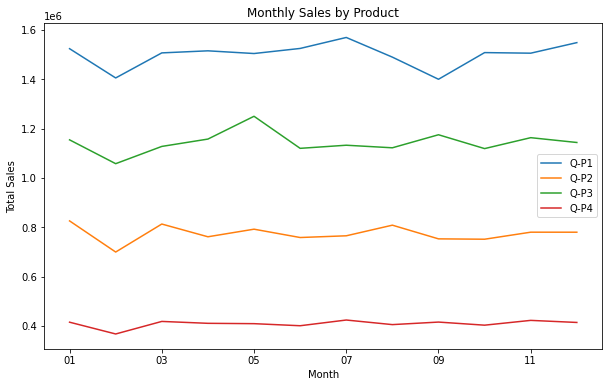

In [61]:
monthly_sales.plot(kind="line", figsize=(10, 6))
plt.title("Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

**Observation:**
there are certain months where we can observe higher unit sales for each of the four products. Specifically, we can observe:

- For P1, the months from March to July have the highest unit sales.
- For P2, the months of January and from March to August have the highest unit sales.
- For P3, the months of May and September have the highest unit sales.
- For P4, we can observe uniform sales throughout the year, with no significant trend observed during any specific month

**Question -2**

Out of all four products , which product has seen the highest sales in all the given years?

In [17]:
yearly_sales = data.groupby(['Year']).sum()[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']]

highest_sales = yearly_sales.idxmax(axis=1)


print('Product with highest sales each year:')
print(highest_sales)


Product with highest sales each year:
Year
2011    Q-P1
2012    Q-P1
2013    Q-P1
2014    Q-P1
2015    Q-P1
2016    Q-P1
2017    Q-P1
2018    Q-P1
2019    Q-P1
2020    Q-P1
2021    Q-P1
2022    Q-P1
dtype: object


In [18]:
yearly_rev = data.groupby(['Year']).sum()[['S-P1', 'S-P2', 'S-P3', 'S-P4']]
highest_rev = yearly_rev.idxmax(axis=1)

print('Product with highest revenu each year:')
print(highest_rev)

Product with highest revenu each year:
Year
2011    S-P3
2012    S-P3
2013    S-P3
2014    S-P3
2015    S-P3
2016    S-P3
2017    S-P3
2018    S-P3
2019    S-P3
2020    S-P3
2021    S-P3
2022    S-P3
dtype: object


**Observation:**

- the product P1 has seen the highest unit sales in all the given years. It has consistently outperformed the other products in terms of sales.
- product P3 has seen the highest revenue each year, indicating that it is priced at a higher value compared to the other products.

**Question 3**

The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.

In [19]:
data['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '12', '10',
       '11'], dtype=object)

In [20]:
data['Day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [21]:
dec_data = data[data['Month'] == '12']
dec_data.head(31)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
473,31-9-2011,2242,401,5926,789,7107.14,2542.34,32118.92,5625.57,31,12,2011
535,01-12-2011,4718,3906,4908,689,14956.06,24764.04,26601.36,4912.57,01,12,2011
536,02-12-2011,7495,991,5875,1253,23759.15,6282.94,31842.50,8933.89,02,12,2011
537,03-12-2011,2179,1109,436,1228,6907.43,7031.06,2363.12,8755.64,03,12,2011
538,04-12-2011,1829,320,4745,1654,5797.93,2028.80,25717.90,11793.02,04,12,2011
539,05-12-2011,7840,1224,1456,838,24852.80,7760.16,7891.52,5974.94,05,12,2011
540,06-12-2011,7416,2440,2323,622,23508.72,15469.60,12590.66,4434.86,06,12,2011
541,07-12-2011,4940,1710,2477,1397,15659.80,10841.40,13425.34,9960.61,07,12,2011
542,08-12-2011,5349,1475,4706,1737,16956.33,9351.50,25506.52,12384.81,08,12,2011
543,09-12-2011,1671,824,2998,646,5297.07,5224.16,16249.16,4605.98,09,12,2011


**observations**

Based on the available data, there is no record of sales data for the 31st of December. Therefore, in order to make observations about sales on the 31st day of the year, we have analyzed the sales data for the 31st day of every month for each year from 2011 to 2021

In [22]:
dec_31_data = data[ (data['Day'] == '31')]
dec_31_data.head(5)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
290,31-03-2011,464,2220,421,1663,1470.88,14074.80,2281.82,11857.19,31,03,2011
351,31-05-2011,1507,2980,3816,1202,4777.19,18893.20,20682.72,8570.26,31,05,2011
412,31-07-2011,4336,744,4717,667,13745.12,4716.96,25566.14,4755.71,31,07,2011
442,31-08-2011,4548,1484,1596,1974,14417.16,9408.56,8650.32,14074.62,31,08,2011


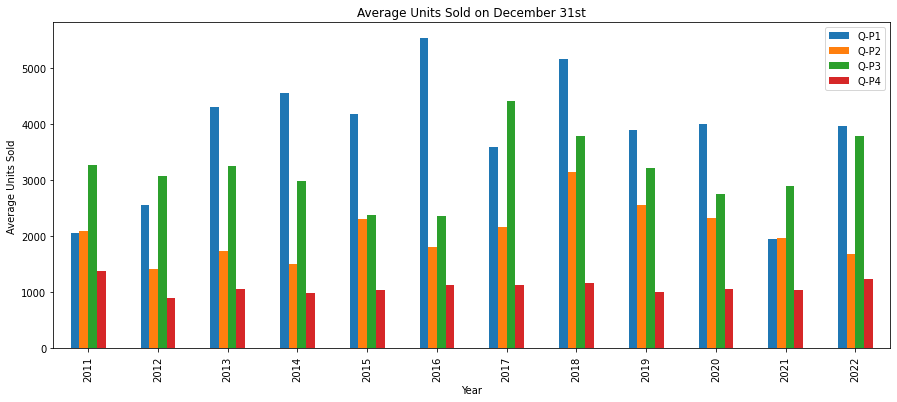

In [23]:
import matplotlib.pyplot as plt

dec_31_data.groupby('Year')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].mean().plot(kind='bar', figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Average Units Sold')
plt.title('Average Units Sold on December 31st')
plt.show()


**Observation:**

- Upon analyzing the data, it is evident that product P1 has consistently had the highest unit sales across all years. Additionally, the year 2016 recorded the highest unit sales for product P1. 
- product P4 has had the lowest unit sales throughout the observed period.

**Question 4**

The CEO is considering an idea to drop the production of any one of the products. He wants you to analyze this data and suggest whether his idea would result in a massive setback for the company.

In [24]:
# Calculate total revenue and units sold for each product
revenue = data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()
units_sold = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()

# Calculate the revenue and units sold for each product as a percentage of the total revenue and units sold
revenue_pct = revenue / revenue.sum()
units_sold_pct = units_sold / units_sold.sum()

# Print the results
print("Revenue Percentage:\n", revenue_pct)
print("\nUnits Sold Percentage:\n", units_sold_pct)

Revenue Percentage:
 S-P1    0.253256
S-P2    0.261377
S-P3    0.330090
S-P4    0.155276
dtype: float64

Units Sold Percentage:
 Q-P1    0.392013
Q-P2    0.202292
Q-P3    0.298836
Q-P4    0.106860
dtype: float64


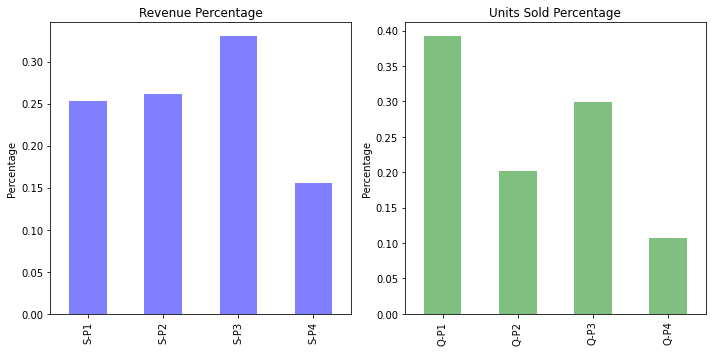

In [25]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the revenue percentage as a bar chart
revenue_pct.plot.bar(ax=ax1, color='b', alpha=0.5)
ax1.set_title('Revenue Percentage')
ax1.set_ylabel('Percentage')

# Plot the units sold percentage as a bar chart
units_sold_pct.plot.bar(ax=ax2, color='g', alpha=0.5)
ax2.set_title('Units Sold Percentage')
ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

**Observation:**

After analyzing the data, it can be observed that P4 has the lowest revenue percentage (15.53%) and the lowest unit sold percentage (10.69%) among all the products. Therefore, dropping the production of P4 might not result in a massive setback for the company. However, before making a final decision, further analysis and evaluation of the potential impact on the company's overall operations and profitability are necessary

**Question 5 :**

The CEO would also like to predict the sales and revenues for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.

In [26]:
revenue_by_year = data.groupby('Year')[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum()
print(revenue_by_year)


            S-P1        S-P2        S-P3        S-P4
Year                                                
2011  4550956.61  4765727.28  6292061.74  2939855.86
2012  4782296.87  4880512.98  6203677.80  2979769.60
2013  4859923.83  4783694.84  6049337.88  2890459.22
2014  4983696.48  5002697.46  6301936.98  2878723.24
2015  4704904.49  4868891.76  6027777.12  2946479.63
2016  4810801.51  4969875.28  6030823.16  2911998.95
2017  4658996.55  5128064.62  6323340.56  2987612.60
2018  4854598.23  4762937.68  6244219.40  2841661.50
2019  4699914.91  4979264.82  6153120.04  2926330.25
2020  4749791.69  4934561.48  6370001.34  2993559.02
2021  4770834.15  4986054.96  6323692.86  2904569.49
2022  4627657.93  4821633.40  6043760.70  2780093.95


In [27]:
sales_by_year = data.groupby('Year')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum()
print(sales_by_year)


         Q-P1    Q-P2     Q-P3    Q-P4
Year                                  
2011  1435633  751692  1160897  412322
2012  1508611  769797  1144590  417920
2013  1533099  754526  1116114  405394
2014  1572144  789069  1162719  403748
2015  1484197  767964  1112136  413251
2016  1517603  783892  1112698  408415
2017  1469715  808843  1166668  419020
2018  1531419  751252  1152070  398550
2019  1482623  785373  1135262  410425
2020  1498357  778322  1175277  419854
2021  1504995  786444  1166733  407373
2022  1459829  760510  1115085  389915


In [28]:
data['Total sales'] = data[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum(axis=1)

In [29]:
data['Total Revenue']= data[['S-P1', 'S-P2', 'S-P3', 'S-P4']].sum(axis=1)

In [30]:
data.head(5)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year,Total sales,Total Revenue
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011,9960,59618.74
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011,15070,68734.34
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011,9320,52400.45
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011,12871,58002.33
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011,10318,58852.44


In [31]:
# Group by year and calculate the total revenue for each year
yearly_sales = data.groupby('Year')['Total sales'].sum()

# Display the result
print(yearly_sales)

Year
2011    3760544
2012    3840918
2013    3809133
2014    3927680
2015    3777548
2016    3822608
2017    3864246
2018    3833291
2019    3813683
2020    3871810
2021    3865545
2022    3725339
Name: Total sales, dtype: int64


In [32]:
# Group by year and calculate the total revenue for each year
yearly_sales = data.groupby('Year')['Total Revenue'].sum()

# Display the result
print(yearly_sales)

Year
2011    18548601.49
2012    18846257.25
2013    18583415.77
2014    19167054.16
2015    18548053.00
2016    18723498.90
2017    19098014.33
2018    18703416.81
2019    18758630.02
2020    19047913.53
2021    18985151.46
2022    18273145.98
Name: Total Revenue, dtype: float64


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 201 to 4565
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4365 non-null   object 
 1   Q-P1           4365 non-null   int64  
 2   Q-P2           4365 non-null   int64  
 3   Q-P3           4365 non-null   int64  
 4   Q-P4           4365 non-null   int64  
 5   S-P1           4365 non-null   float64
 6   S-P2           4365 non-null   float64
 7   S-P3           4365 non-null   float64
 8   S-P4           4365 non-null   float64
 9   Day            4365 non-null   object 
 10  Month          4365 non-null   object 
 11  Year           4365 non-null   object 
 12  Total sales    4365 non-null   int64  
 13  Total Revenue  4365 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 511.5+ KB


In [34]:
data = data.drop(['Date','Day'], axis=1)

In [35]:
data.head(5)

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Month,Year,Total sales,Total Revenue
201,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,2011,9960,59618.74
202,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,01,2011,15070,68734.34
203,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,01,2011,9320,52400.45
204,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,01,2011,12871,58002.33
205,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,01,2011,10318,58852.44


In [36]:
# split data into features and target
X = data.drop(['Total sales', 'Total Revenue'], axis=1)
y_sales = data['Total sales']
y_revenue = data['Total Revenue']

# split data into train and test sets
X_train, X_test, y_train_sales, y_test_sales, y_train_revenue, y_test_revenue = train_test_split(X, y_sales, y_revenue, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# create models
lr_sales = LinearRegression()
rf_sales = RandomForestRegressor(n_estimators=100, random_state=42)
gb_sales = GradientBoostingRegressor(n_estimators=100, random_state=42)

lr_revenue = LinearRegression()
rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
gb_revenue = GradientBoostingRegressor(n_estimators=100, random_state=42)



In [38]:
# train models
lr_sales.fit(X_train, y_train_sales)
rf_sales.fit(X_train, y_train_sales)
gb_sales.fit(X_train, y_train_sales)

lr_revenue.fit(X_train, y_train_revenue)
rf_revenue.fit(X_train, y_train_revenue)
gb_revenue.fit(X_train, y_train_revenue)

KeyboardInterrupt: 

In [ ]:

# make predictions
years = np.arange(2024, 2025)
months = np.arange(1, 13)
dates = []
for year in years:
    for month in months:
        dates.append((month, year))
pred_df = pd.DataFrame(dates, columns=['Month', 'Year'])
pred_df['Month'] = pd.to_datetime(pred_df['Month'], format='%m').dt.month
pred_df['Year'] = pd.to_datetime(pred_df['Year'], format='%Y').dt.year

# add missing columns to pred_df
pred_df['Q-P1'] = 0
pred_df['Q-P2'] = 0
pred_df['Q-P3'] = 0
pred_df['Q-P4'] = 0
pred_df['S-P1'] = 0
pred_df['S-P2'] = 0
pred_df['S-P3'] = 0
pred_df['S-P4'] = 0

lr_sales_predictions = lr_sales.predict(pred_df)
rf_sales_predictions = rf_sales.predict(pred_df)
gb_sales_predictions = gb_sales.predict(pred_df)

lr_revenue_predictions = lr_revenue.predict(pred_df)
rf_revenue_predictions = rf_revenue.predict(pred_df)
gb_revenue_predictions = gb_revenue.predict(pred_df)



c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Chandru\AppDa

In [ ]:
# add predictions to dataframe
pred_df['LR Total sales'] = lr_sales_predictions
pred_df['RF Total sales'] = rf_sales_predictions
pred_df['GB Total sales'] = gb_sales_predictions

pred_df['LR Total Revenue'] = lr_revenue_predictions
pred_df['RF Total Revenue'] = rf_revenue_predictions
pred_df['GB Total Revenue'] = gb_revenue_predictions

# display predictions for 2024
pred_df = pred_df[['Month', 'Year','LR Total sales',
       'LR Total Revenue', 'RF Total sales','RF Total Revenue', 'GB Total sales',  'GB Total Revenue']]
pred_df

,Month,Year,LR Total sales,LR Total Revenue,RF Total sales,RF Total Revenue,GB Total sales,GB Total Revenue
0,1,2024,49.221967,311.780367,3478.95,19503.8871,2801.690852,16289.440114
1,2,2024,49.312474,312.067273,3478.95,19503.8871,2801.690852,16289.440114
2,3,2024,49.402981,312.354180,3478.95,19503.8871,2801.690852,16289.440114
3,4,2024,49.493488,312.641086,3478.95,19503.8871,2801.690852,16289.440114
4,5,2024,49.583994,312.927992,3478.95,19503.8871,2801.690852,16289.440114
5,6,2024,49.674501,313.214899,3478.95,19503.8871,2801.690852,16289.440114
6,7,2024,49.765008,313.501805,3478.95,19503.8871,2801.690852,16289.440114
7,8,2024,49.855515,313.788712,3478.95,19503.8871,2801.690852,16289.440114
8,9,2024,49.946021,314.075618,3478.95,19503.8871,2801.690852,16289.440114
9,10,2024,50.036528,314.362524,3478.95,19503.8871,2801.690852,16289.440114


In [ ]:
lr_sales_2024 = pred_df['LR Total sales'].mean()
rf_sales_2024 = pred_df['RF Total sales'].mean()
GB_sales_2024 = pred_df['GB Total sales'].mean()

lr_Revenue_2024 = pred_df['LR Total Revenue'].mean()
rf_Revenue_2024 = pred_df['RF Total Revenue'].mean()
GB_Revenue_2024 = pred_df['GB Total Revenue'].mean()


In [ ]:
pred_df.columns

Index(['Month', 'Year', 'LR Total sales', 'LR Total Revenue', 'RF Total sales',
       'RF Total Revenue', 'GB Total sales', 'GB Total Revenue'],
      dtype='object')

In [ ]:
print("\n")
print("predictions for 2024 sales: {:.2f}".format(lr_sales_2024))
print("predictions for 2024 Revenue: {:.2f}".format(lr_Revenue_2024))
print("\n")
print("----------------------------------------")
print("predictions for 2024 sales: {:.2f}".format(rf_sales_2024))
print("predictions for 2024 Revenue: {:.2f}".format(rf_Revenue_2024))
print("\n")
print("----------------------------------------")
print("predictions for 2024 sales: {:.2f}".format(GB_sales_2024))
print("predictions for 2024 Revenue: {:.2f}".format(GB_Revenue_2024))





predictions for 2024 sales: 49.72
predictions for 2024 Revenue: 313.36


----------------------------------------
predictions for 2024 sales: 3478.95
predictions for 2024 Revenue: 19503.89


----------------------------------------
predictions for 2024 sales: 2801.69
predictions for 2024 Revenue: 16289.44
